## 수직 에지 누적 보팅

In [40]:
from PIL import Image
from IPython.display import display
import os
import cv2
import matplotlib.pyplot as plt

((484, 368), (368, 484, 3))

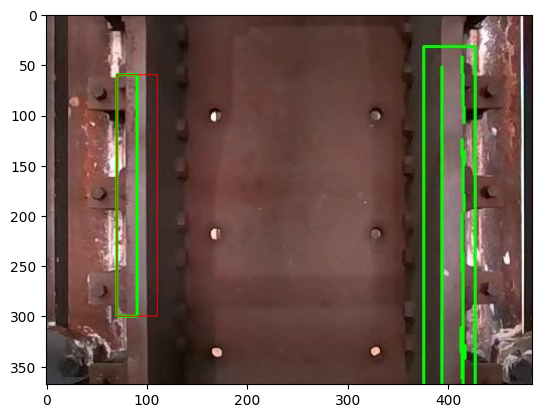

In [79]:
fname = os.path.join('line_data','image1.jpg')
image = Image.open(fname).convert('RGB') # , Image.open(mask_fn).convert('L')
np_image = np.array(image)

start_r,start_c,end_r,end_c = 70,60,90,300
cp_img = np_image.copy()
cv2.rectangle(cp_img, (start_r,start_c), (end_r,end_c), color=(0, 255, 0), thickness=2)
cv2.rectangle(cp_img, (start_r,start_c), (110, end_c), color=(255, 0, 0), thickness=1)
plt.imshow(cp_img)
image.size, np_image.shape

(<matplotlib.image.AxesImage at 0x1f572b22b20>, (368, 484))

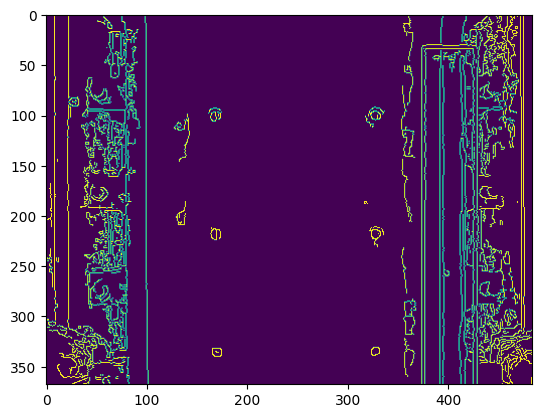

In [62]:
edges = cv2.Canny(np_image.copy(), threshold1=30, threshold2=150)
plt.imshow(edges), edges.shape

최대 에지 인덱스와 누적값: 43350
2nd 최대 에지 인덱스와 누적값: 20400
좌표에 따른 전체 누적 값: [(70, 14280), (71, 12495), (72, 14280), (73, 11220), (74, 13770), (75, 20400), (76, 8160), (77, 13770), (78, 8670), (79, 43350), (80, 11985), (81, 14535), (82, 17340), (83, 5610), (84, 6885), (85, 4590), (86, 5355), (87, 4590), (88, 4080), (89, 4080)]

최대 에지 인덱스와 누적값: 54315
2nd 최대 에지 인덱스와 누적값: 43350
좌표에 따른 전체 누적 값: [(70, 14280), (71, 12495), (72, 14280), (73, 11220), (74, 13770), (75, 20400), (76, 8160), (77, 13770), (78, 8670), (79, 43350), (80, 11985), (81, 14535), (82, 17340), (83, 5610), (84, 6885), (85, 4590), (86, 5355), (87, 4590), (88, 4080), (89, 4080), (90, 510), (91, 765), (92, 1785), (93, 255), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 54315), (100, 6885), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0)]


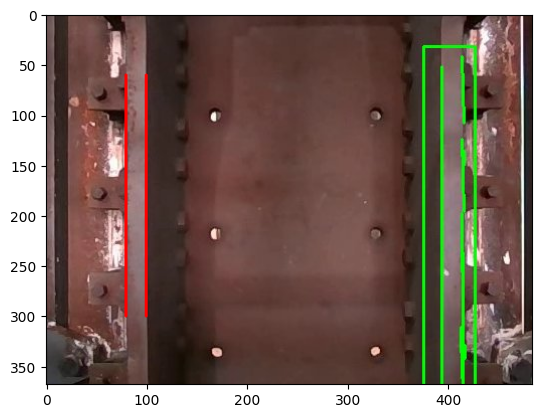

In [85]:
def accum_edges(edges, start_r,start_c,end_r,end_c):
    votes = [(r,np.sum(edges[start_c:end_c,r])) for r in range(start_r,end_r)]
    sorted_votes = sorted(votes, key=lambda x: x[1], reverse=True)
    return votes, sorted_votes[0], sorted_votes[1]


start_r,start_c,end_r,end_c = 70,60,90,300  # 70,60,110,300
votes, best, best2 = accum_edges(edges, start_r,start_c,end_r,end_c)
print(f"최대 에지 인덱스와 누적값: {best[1]}")
print(f"2nd 최대 에지 인덱스와 누적값: {best2[1]}")
print(f"좌표에 따른 전체 누적 값: {votes}")

start_r,start_c,end_r,end_c = 70,60,110,300
votes, best, best2 = accum_edges(edges, start_r,start_c,end_r,end_c)
print(f"\n최대 에지 인덱스와 누적값: {best[1]}")
print(f"2nd 최대 에지 인덱스와 누적값: {best2[1]}")
print(f"좌표에 따른 전체 누적 값: {votes}")

img = np_image.copy()
start_point, end_point = (best[0],start_c), (best[0], end_c) 
cv2.line(img, start_point, end_point, color=(255,0,0), thickness=2)

start_point, end_point = (best2[0],start_c), (best2[0], end_c) 
cv2.line(img, start_point, end_point, color=(255,0,0), thickness=2)
plt.imshow(img)

In [74]:
# sorting해서 best와 2nd best추출
sorted_votes = sorted(votes, key=lambda x: x[1], reverse=True)
sorted_votes[:6]

[(99, 54315), (79, 43350), (75, 20400), (82, 17340), (81, 14535), (70, 14280)]

### Sobel에지는 별로임

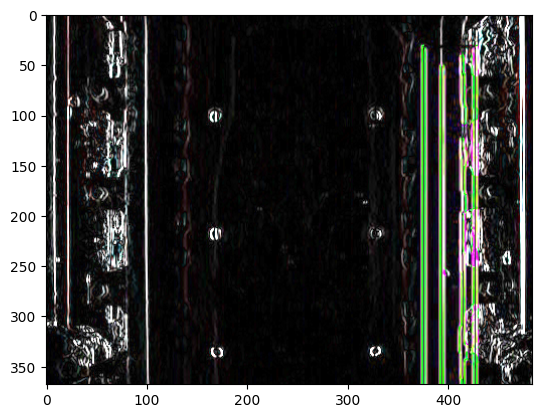

In [47]:
sobel_x = cv2.Sobel(np_image.copy(), cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(np_image.copy(), cv2.CV_64F, 0, 1, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

plt.imshow(sobel_x)